In [38]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import xgboost as xgb
import scipy.stats as stats
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    median_absolute_error, explained_variance_score, max_error
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint, uniform

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", context="notebook", font_scale=1.1)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

df = pd.read_csv("openml_metadata_created.csv")

In [39]:
df.iloc[0]

,0
Task_id,4363
dataset_id,793
dataset_name,fri_c3_250_10
n_samples,187
n_features,10
n_numeric_features,10
n_categorical_features,0
n_binary_features,0
n_classes,2
class_balance_std,0.040107


In [40]:
df.head()

,Task_id,dataset_id,dataset_name,n_samples,n_features,n_numeric_features,n_categorical_features,n_binary_features,n_classes,class_balance_std,class_entropy,mean_feature_variance,median_feature_variance,mean_corr_abs,max_corr_abs,feature_skewness_mean,feature_kurtosis_mean,missing_percentage,avg_cardinality_categorical,complexity_ratio,intrinsic_dim_estimate,landmark_lr_accuracy,landmark_dt_depth3_accuracy,landmark_knn3_accuracy,landmark_random_noise_accuracy,fisher_discriminant_ratio,model_id,model_name,model_family,is_deep_learning,is_tree_based,is_linear,parameterization_type,complexity_training_big_o,complexity_inference_big_o,is_probabilistic,is_ensemble_model,regularization_supported,supports_multiclass_natively,supports_online_learning,supports_multiple_trees,tree_growth_strategy,default_max_depth,supports_pruning,splitting_criterion,architecture_type,supports_dropout,supports_batchnorm,default_activation,supports_cuda_acceleration,supports_non_linearity,supports_categorical_directly,supports_missing_values,supports_gpu,n_estimators,avg_tree_depth,max_tree_depth,n_leaves_mean,n_layers,hidden_units_mean,dropout_rate_mean,activation_type,batch_size,epochs,accuracy,f1_macro,precision_macro,trained_model_size_kb,inference_speed_ms,static_usage_ram_kb,dynamic_usage_ram_kb,full_ram_usage_kb,model_n_parameters,score
0,4363,793,fri_c3_250_10,187,10,10,0,0,2,0.040107,0.995354,1.010385,1.006316,0.160625,0.92884,0.215351,-0.501535,0.0,0.0,0.053476,7.0,0.6,0.6,0.5,0.56,0.022841,1,logreg,Linear,False,False,True,linear-in-features,O(n · d),O(d),True,False,L2,True,False,False,none,0,False,none,none,False,False,none,False,False,False,False,False,0,0.0,0,0.0,0,0.0,0.0,none,0,0,0.761905,0.760941,0.760606,3.416016,0.000000,3.416016,0.0,3.416016,10,0.880605
1,4363,793,fri_c3_250_10,187,10,10,0,0,2,0.040107,0.995354,1.010385,1.006316,0.160625,0.92884,0.215351,-0.501535,0.0,0.0,0.053476,7.0,0.6,0.6,0.5,0.56,0.022841,2,rf,TreeEnsemble,False,True,False,fixed-per-estimator,O(n · log n · trees),O(trees · depth),True,True,NaN,True,False,True,depth-based,0,False,gini,none,False,False,none,False,True,False,False,False,200,0.0,0,0.0,0,0.0,0.0,none,0,0,0.873016,0.870370,0.881053,762.713867,0.473620,762.713867,148.0,910.713867,8754,0.581335
2,4363,793,fri_c3_250_10,187,10,10,0,0,2,0.040107,0.995354,1.010385,1.006316,0.160625,0.92884,0.215351,-0.501535,0.0,0.0,0.053476,7.0,0.6,0.6,0.5,0.56,0.022841,3,xgboost,BoostedTrees,False,True,False,fixed-per-estimator,O(n · log n · trees),O(trees · depth),True,True,L1/L2,True,False,True,leaf-based,6,True,gain,none,False,False,none,True,True,False,True,True,200,6.0,6,0.0,0,0.0,0.0,none,0,0,0.888889,0.887068,0.893971,198.664062,0.000000,198.664062,52.0,250.664062,0,0.878491
3,4363,793,fri_c3_250_10,187,10,10,0,0,2,0.040107,0.995354,1.010385,1.006316,0.160625,0.92884,0.215351,-0.501535,0.0,0.0,0.053476,7.0,0.6,0.6,0.5,0.56,0.022841,4,cnn1d,CNN,True,False,False,linear-in-features,O(n · d · epochs),O(d · filters),True,False,L2,True,False,False,none,0,False,none,CNN1D,False,False,relu,True,True,False,False,True,0,0.0,0,0.0,2,8.0,0.0,relu,128,20,0.634921,0.609750,0.644444,3.171875,0.048066,1.132812,17710.5,17711.632812,290,0.706083
4,4363,793,fri_c3_250_10,187,10,10,0,0,2,0.040107,0.995354,1.010385,1.006316,0.160625,0.92884,0.215351,-0.501535,0.0,0.0,0.053476,7.0,0.6,0.6,0.5,0.56,0.022841,5,tiny_rnn,RNN,True,False,False,linear-in-features,O(n · d · hidden_dim · epochs),O(d · hidden_dim),True,False,L2,True,False,False,none,0,False,none,RNN-GRU,False,False,tanh,True,True,False,False,True,0,0.0,0,0.0,2,32.0,0.0,tanh,128,20,0.539683,0.350515,0.269841,15.421875,0.000000,13.382812,26299.5,26312.882812,3426,0.615546


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15610 entries, 0 to 15609
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Task_id                         15610 non-null  int64  
 1   dataset_id                      15610 non-null  int64  
 2   dataset_name                    15610 non-null  object 
 3   n_samples                       15610 non-null  int64  
 4   n_features                      15610 non-null  int64  
 5   n_numeric_features              15610 non-null  int64  
 6   n_categorical_features          15610 non-null  int64  
 7   n_binary_features               15610 non-null  int64  
 8   n_classes                       15610 non-null  int64  
 9   class_balance_std               15610 non-null  float64
 10  class_entropy                   15610 non-null  float64
 11  mean_feature_variance           15610 non-null  float64
 12  median_feature_variance         

In [42]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
bool_cols = df.select_dtypes(include=["bool"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(cat_cols))
print("Boolean columns:", len(bool_cols))

Numeric columns: 46
Categorical columns: 12
Boolean columns: 16


In [43]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Task_id,15610.0,2.378897e+05,1.528050e+05,5.000000,75171.000000,361193.500000,3.627360e+05,3.637450e+05
dataset_id,15610.0,2.812331e+04,2.104815e+04,2.000000,983.000000,43034.000000,4.469000e+04,4.705200e+04
n_samples,15610.0,5.400429e+03,1.146440e+04,50.000000,428.000000,1500.000000,3.774000e+03,7.500000e+04
n_features,15610.0,3.689238e+01,5.025818e+01,1.000000,8.000000,17.000000,4.500000e+01,3.700000e+02
n_numeric_features,15610.0,2.966323e+01,4.799780e+01,0.000000,4.000000,10.000000,3.000000e+01,3.700000e+02
n_categorical_features,15610.0,7.229148e+00,2.061851e+01,0.000000,0.000000,0.000000,6.000000e+00,2.400000e+02
n_binary_features,15610.0,5.003139e+00,1.990966e+01,0.000000,0.000000,0.000000,2.000000e+00,3.200000e+02
n_classes,15610.0,6.567265e+00,2.174288e+01,2.000000,2.000000,2.000000,5.000000e+00,3.550000e+02
class_balance_std,15610.0,1.271247e-01,1.428889e-01,0.000000,0.002732,0.064000,2.164179e-01,4.984082e-01
class_entropy,15610.0,1.494548e+00,1.239623e+00,0.017090,0.904381,0.999872,1.584848e+00,8.457218e+00


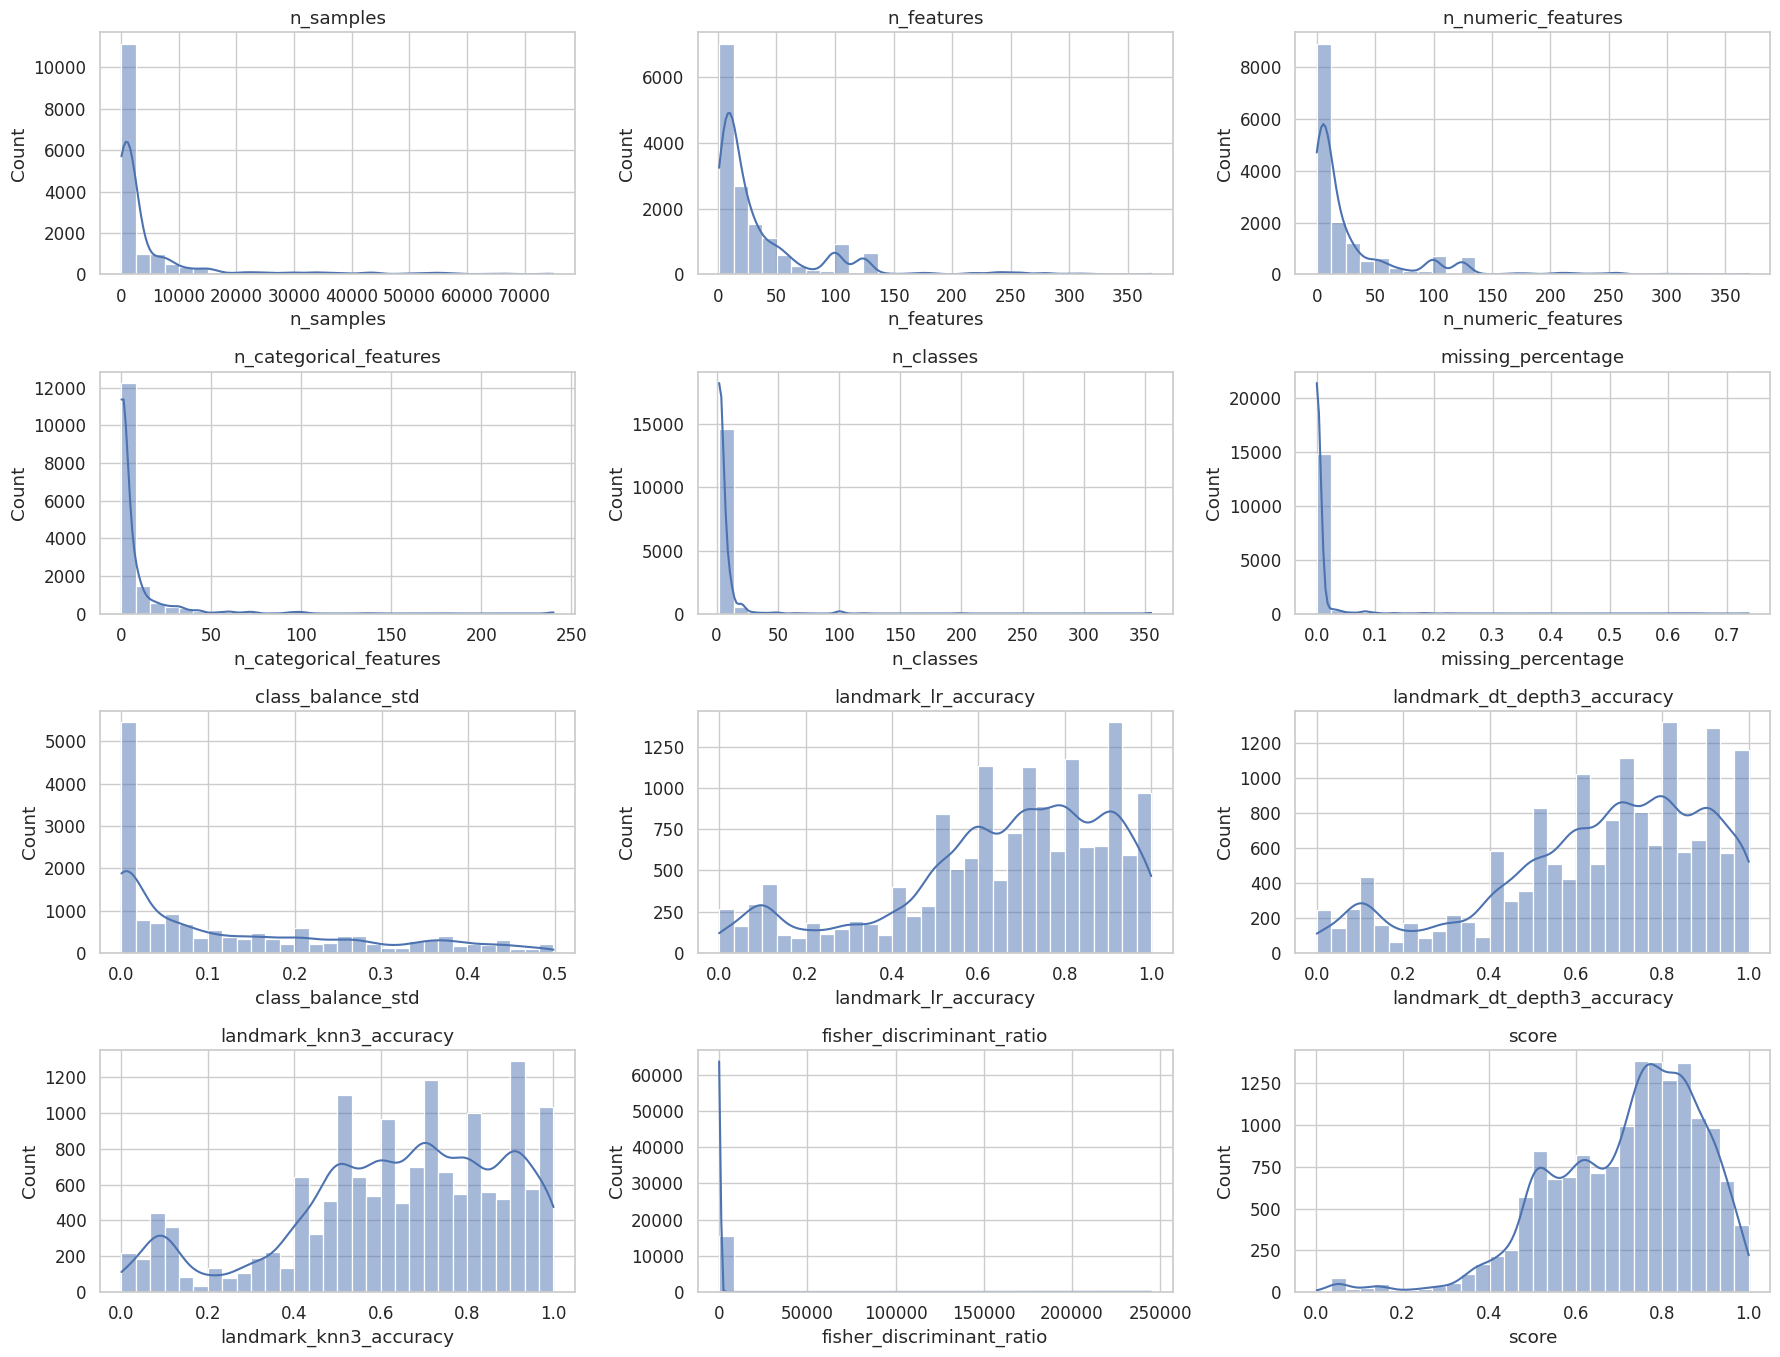

In [44]:
cols_to_plot = [
    "n_samples", "n_features", "n_numeric_features",
    "n_categorical_features", "n_classes",
    "missing_percentage", "class_balance_std",
    "landmark_lr_accuracy", "landmark_dt_depth3_accuracy",
    "landmark_knn3_accuracy", "fisher_discriminant_ratio",
    "score"
]

plt.figure(figsize=(18, 20))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

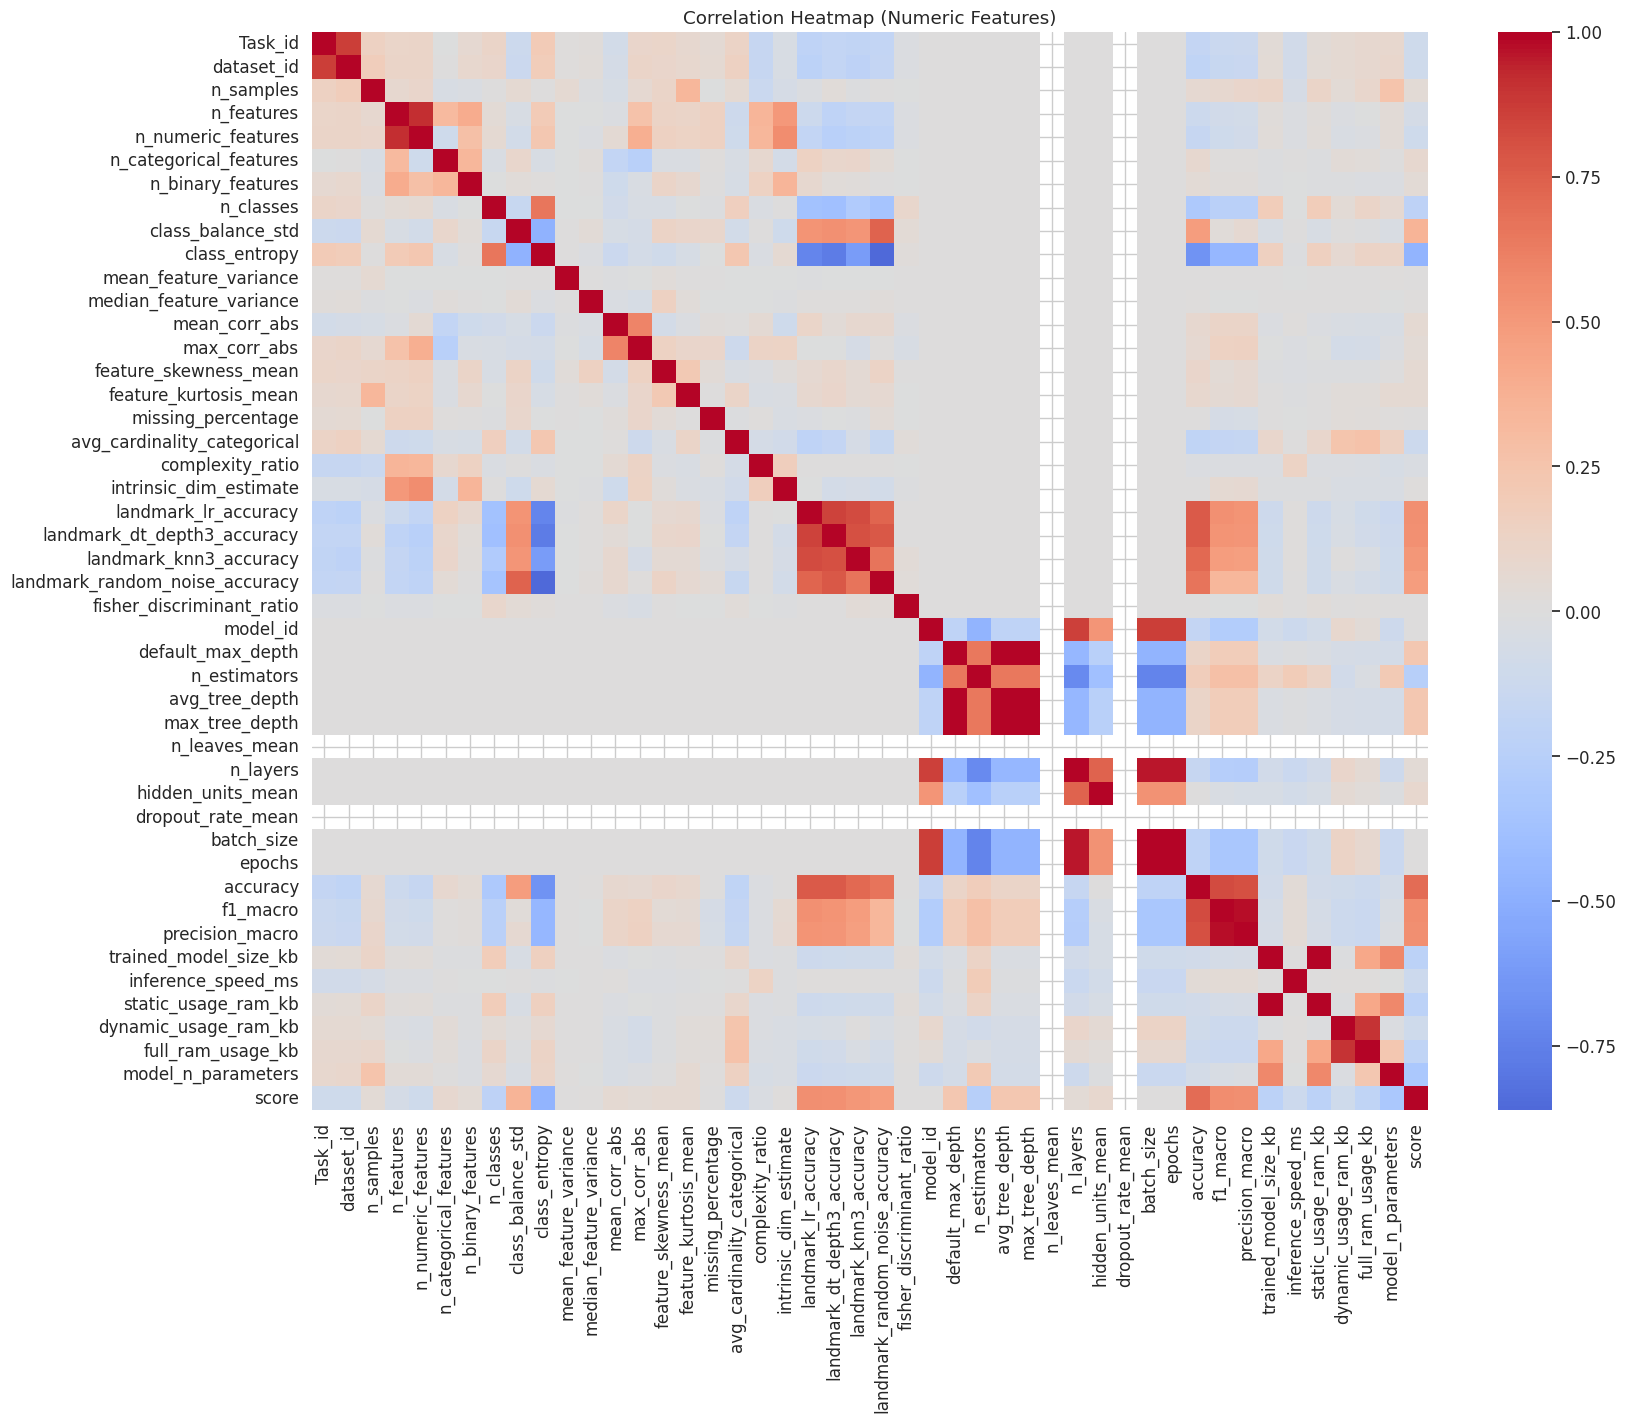

In [45]:
plt.figure(figsize=(18, 14))
corr = df[numeric_cols].corr()

sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [46]:
cols_to_check = ['n_leaves_mean', 'dropout_rate_mean']

for col in cols_to_check:
    print(f"--- Investigating '{col}' ---")

    n_missing = df[col].isna().sum()
    pct_missing = (n_missing / len(df)) * 100
    print(f"Missing Values: {n_missing} ({pct_missing:.2f}%)")

    n_unique = df[col].nunique(dropna=True)
    unique_vals = df[col].unique()

    print(f"Unique Values (excluding NaNs): {n_unique}")
    if n_unique <= 10:
        print(f"Actual Values: {unique_vals}")
    else:
        print(f"First 10 Values: {unique_vals[:10]}")
    print()

--- Investigating 'n_leaves_mean' ---
Missing Values: 0 (0.00%)
Unique Values (excluding NaNs): 1
Actual Values: [0.]

--- Investigating 'dropout_rate_mean' ---
Missing Values: 0 (0.00%)
Unique Values (excluding NaNs): 1
Actual Values: [0.]



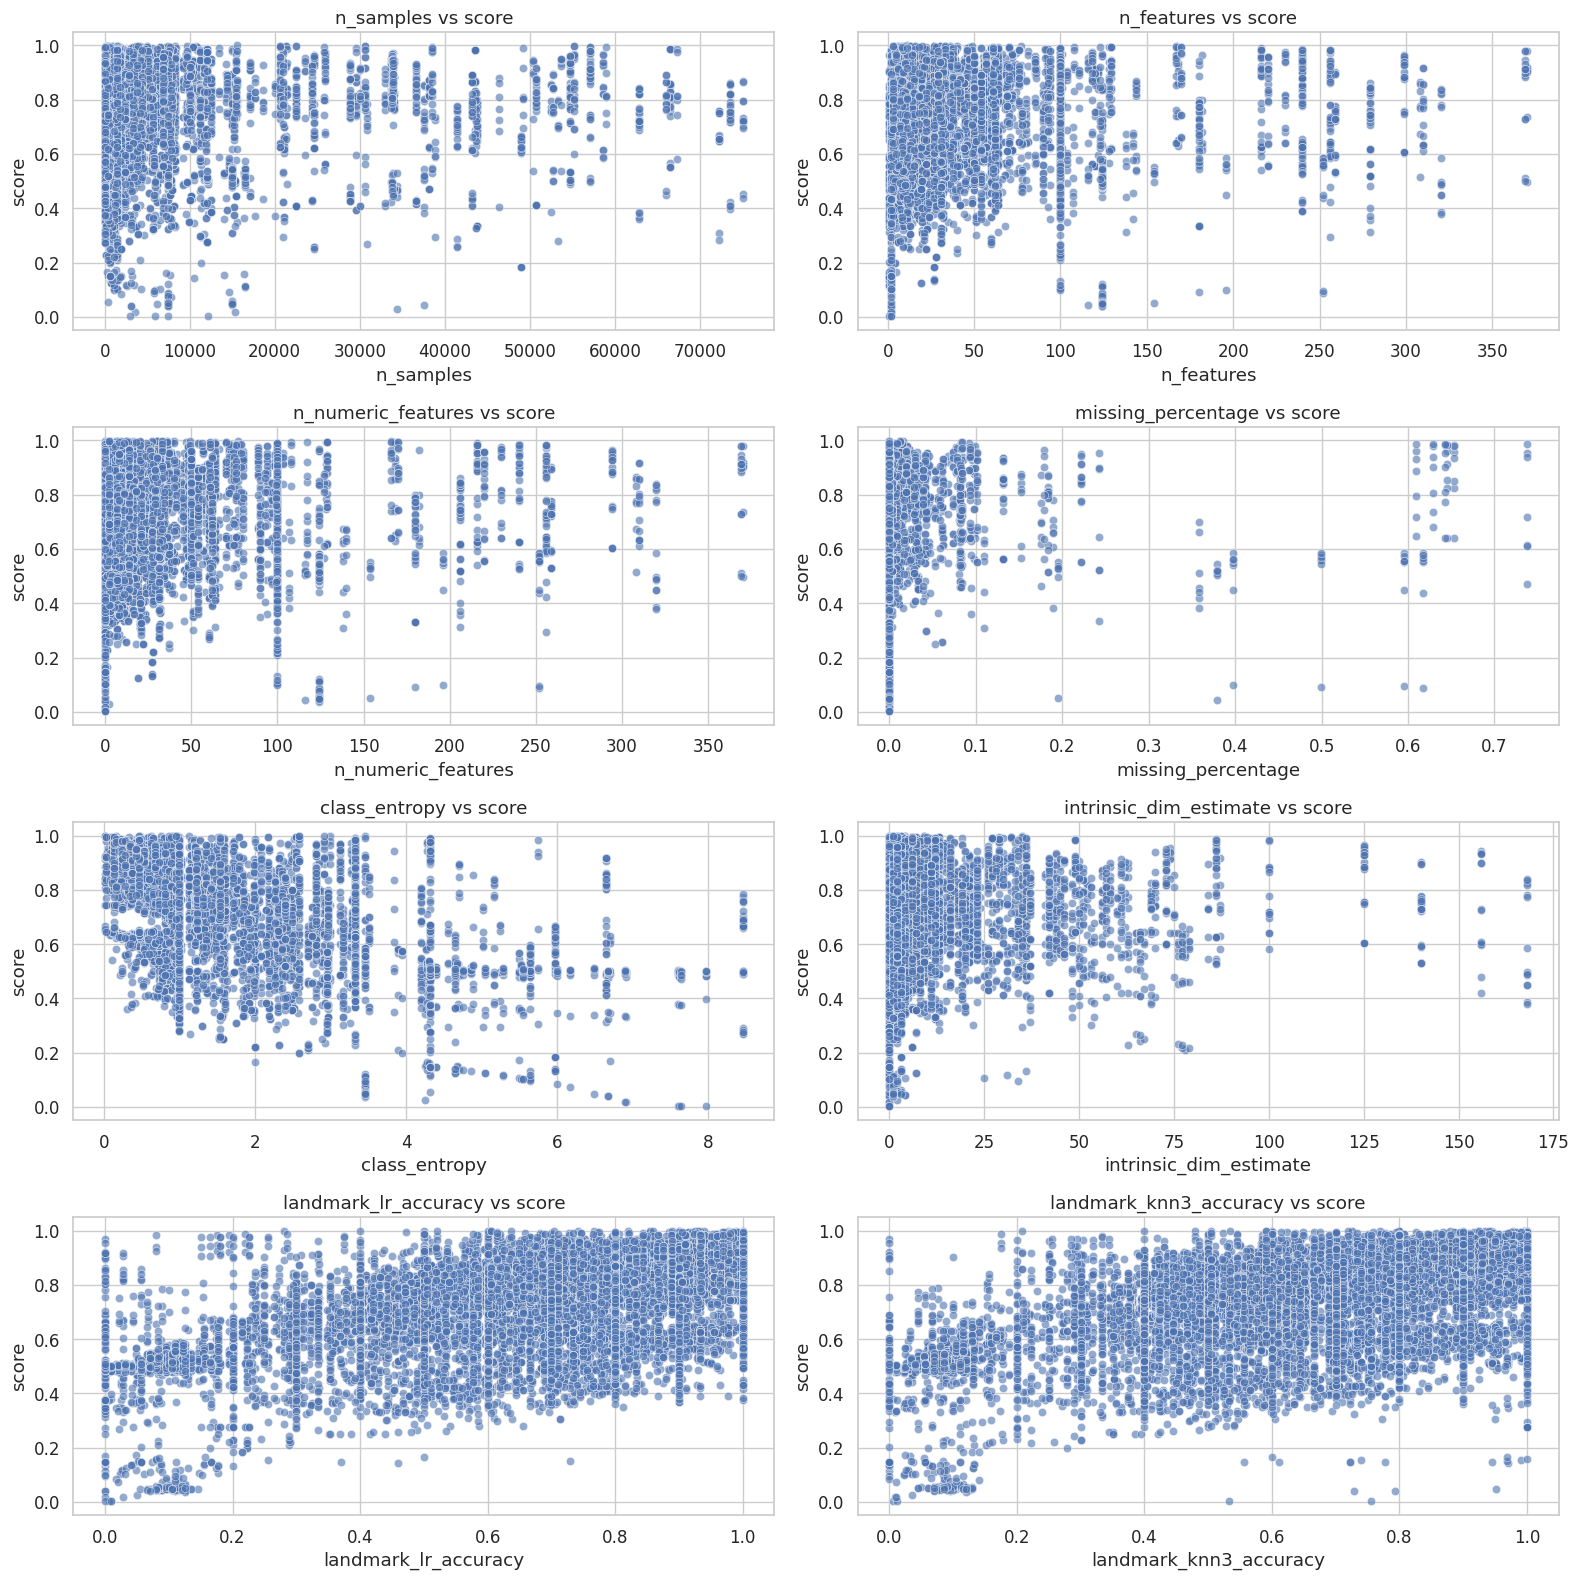

In [47]:
cols_vs_score = [
    "n_samples", "n_features", "n_numeric_features",
    "missing_percentage", "class_entropy", "intrinsic_dim_estimate",
    "landmark_lr_accuracy", "landmark_knn3_accuracy"
]

plt.figure(figsize=(16, 16))
for i, col in enumerate(cols_vs_score, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(data=df, x=col, y="score", alpha=0.6)
    plt.title(f"{col} vs score")
plt.tight_layout()
plt.show()

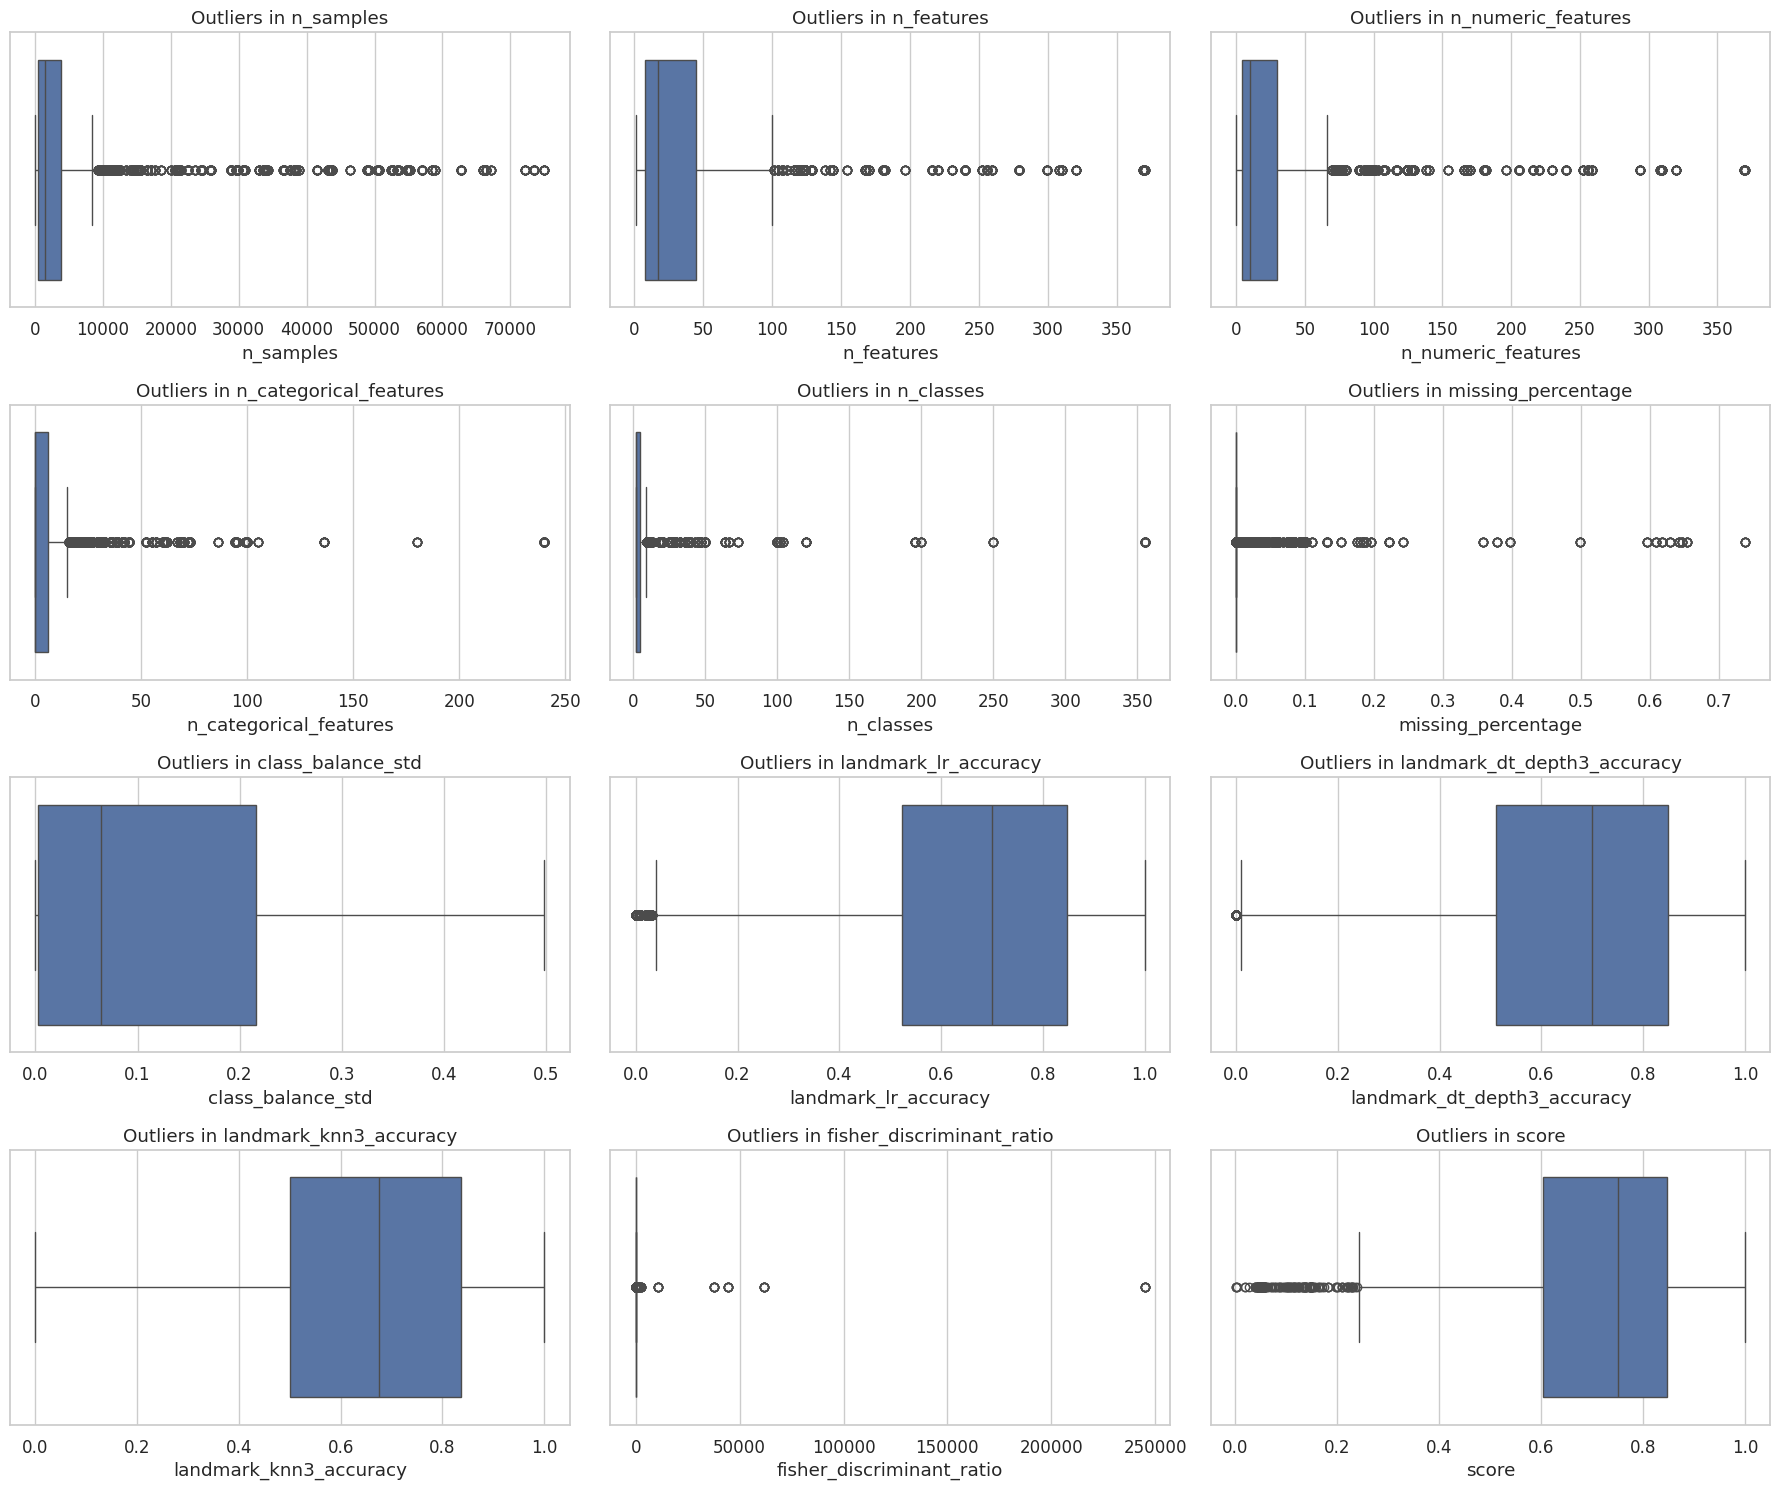

In [48]:
plt.figure(figsize=(18, 22))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()


In [49]:
print("\n--- Missing Values (%) ---")
print((df.isna().mean() * 100).sort_values(ascending=False))


--- Missing Values (%) ---
regularization_supported          14.285714
landmark_lr_accuracy               0.941704
landmark_dt_depth3_accuracy        0.807175
landmark_knn3_accuracy             0.807175
n_features                         0.000000
n_numeric_features                 0.000000
dataset_name                       0.000000
n_samples                          0.000000
Task_id                            0.000000
dataset_id                         0.000000
class_balance_std                  0.000000
n_classes                          0.000000
n_binary_features                  0.000000
n_categorical_features             0.000000
max_corr_abs                       0.000000
mean_feature_variance              0.000000
median_feature_variance            0.000000
class_entropy                      0.000000
missing_percentage                 0.000000
feature_kurtosis_mean              0.000000
feature_skewness_mean              0.000000
avg_cardinality_categorical        0.000000
intr

In [50]:
threshold = 1e10

num_df = df.select_dtypes(include=[np.number])

summary = pd.DataFrame({
    "inf_count": (num_df == np.inf).sum(),
    "-inf_count": (num_df == -np.inf).sum(),
    "nan_count": num_df.isna().sum(),
    "too_large_count": (num_df.abs() > threshold).sum(),
    "rows_with_issue": [num_df[(num_df[col]==np.inf) | (num_df[col]==-np.inf) | (num_df[col].abs()>threshold) | (num_df[col].isna())].shape[0] for col in num_df.columns]
})

print("Problematic values summary per numeric column:\n")
print(summary)


Problematic values summary per numeric column:

                                inf_count  -inf_count  nan_count  \
Task_id                                 0           0          0   
dataset_id                              0           0          0   
n_samples                               0           0          0   
n_features                              0           0          0   
n_numeric_features                      0           0          0   
n_categorical_features                  0           0          0   
n_binary_features                       0           0          0   
n_classes                               0           0          0   
class_balance_std                       0           0          0   
class_entropy                           0           0          0   
mean_feature_variance                   0           0          0   
median_feature_variance                 0           0          0   
mean_corr_abs                           0           0          0   


In [51]:
cols = [
    'landmark_lr_accuracy',
    'landmark_dt_depth3_accuracy',
    'landmark_knn3_accuracy',
    'n_estimators'
]

df = df.dropna(subset=cols)
df.shape

(15463, 74)

In [52]:
def preprocessing_logic(df: pd.DataFrame) -> pd.DataFrame:
    cols_to_drop = [
        "accuracy",
        "f1_macro",
        "precision_macro",
        "trained_model_size_kb",
        "inference_speed_ms",
        "model_name",
        "Task_id",
        "dataset_id",
        "model_id",
        "dataset_name",
        "static_usage_ram_kb",
        "dynamic_usage_ram_kb",
        "full_ram_usage_kb",
        "mean_feature_variance",
        "median_feature_variance"
    ]
    df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors="ignore")

    zero_variance_cols = [
        "n_leaves_mean",
        "dropout_rate_mean"
    ]
    df = df.drop(columns=[c for c in zero_variance_cols if c in df.columns], errors="ignore")

    if "regularization_supported" in df.columns:
        df = df.drop("regularization_supported", axis=1)

    return df

In [53]:
pre_clean = FunctionTransformer(preprocessing_logic)

In [54]:
df = df.drop_duplicates()
df.shape

(15463, 74)

In [55]:
target = "score"
X = df.drop(columns=[target])
y = df[target]

categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X.select_dtypes(include=["number", "bool"]).columns.tolist()

cols_removed = set([
    "accuracy", "f1_macro", "precision_macro",
    "trained_model_size_kb", "inference_speed_ms",
    "model_name", "Task_id", "dataset_id",
    "model_id", "dataset_name",
    "static_usage_ram_kb", "dynamic_usage_ram_kb", "full_ram_usage_kb",
    "n_leaves_mean", "dropout_rate_mean",
    "regularization_supported",
    "mean_feature_variance",
    "median_feature_variance"
])

categorical_features = [c for c in categorical_features if c not in cols_removed]
numerical_features    = [c for c in numerical_features if c not in cols_removed]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [56]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ("num", "passthrough", numerical_features),
    ]
)

model = Pipeline(steps=[
    ("clean", pre_clean),
    ("preprocess", preprocess),
    ("xgb", xgb.XGBRegressor(
        n_estimators=500,
        random_state=42,
        n_jobs=-1,
        eval_metric='rmse'
    ))
])

param_grid = {
    "xgb__n_estimators": [300, 400, 500],
    "xgb__max_depth": [4, 5, 6],
    "xgb__learning_rate": [0.05, 0.08, 0.1],
    "xgb__subsample": [0.8, 0.9, 1.0],
    "xgb__colsample_bytree": [0.8, 0.9, 1.0],
    "xgb__gamma": [0, 0.5, 1]
}


grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [57]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clean',
                                        FunctionTransformer(func=<function preprocessing_logic at 0x7ddbe61e6520>)),
                                       ('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['model_family',
                                                                          'parameterization_type',
                                                                          'complexity_training_big_o',
                                                                          'complexity_inference_big_o',
                                                                          'tree_growth_st...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.8, 0.9, 1.0],
                         'xgb__gamma': [0, 0.5, 1],
                         'xgb__learning_rate': [0.05, 0.08, 0.1],
                         'xgb__max_depth': [4, 5, 6],
                         'xgb__n_estimators': [300, 400, 500],
                         'xgb__subsample': [0.8, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=2)

===== Model Performance =====
MAE           : 0.0239
MSE           : 0.0013
RMSE          : 0.0365
R²            : 0.9521
Adjusted R²   : 0.9510
Median AE     : 0.0161
Explained Var : 0.9521
Max Error     : 0.3312
MAPE (%)      : 3.76%



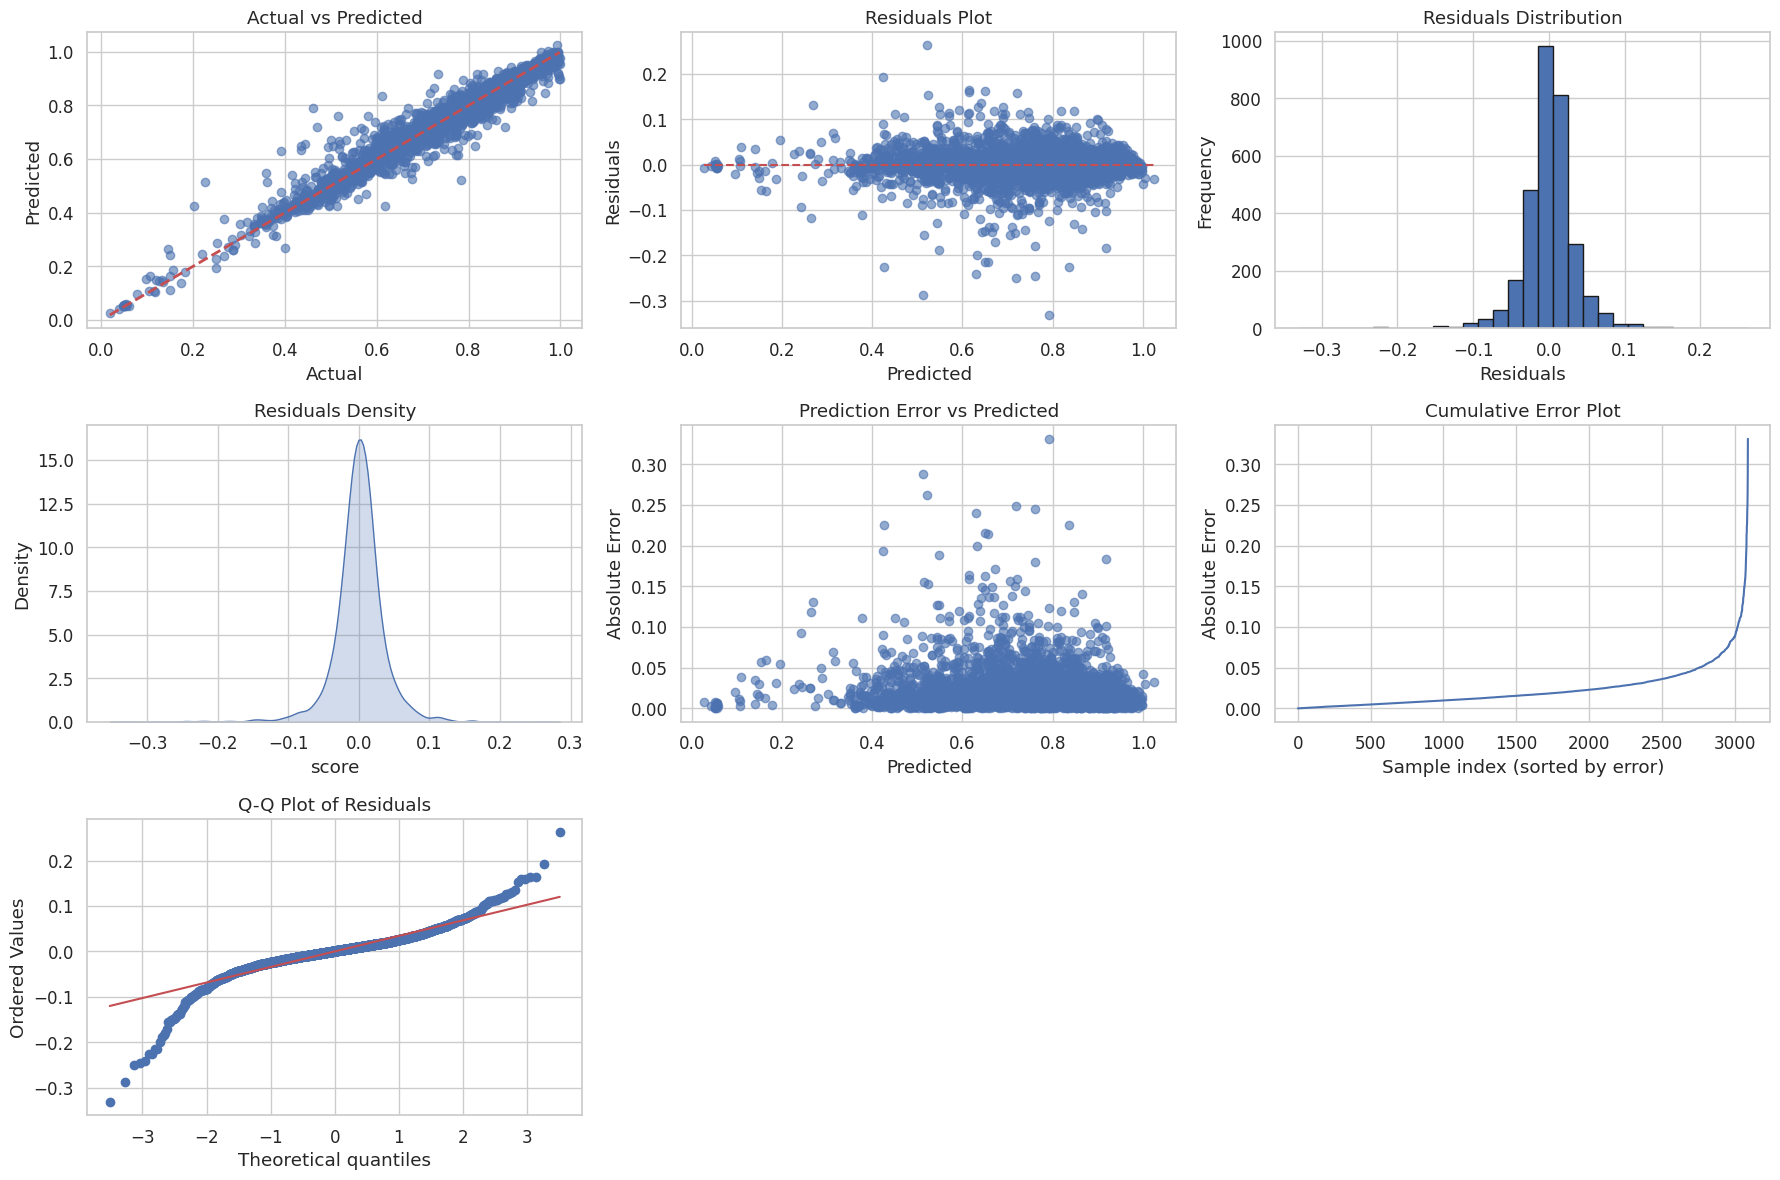

In [58]:
model = grid_search.best_estimator_

# Predictions
preds = model.predict(X_test)
residuals = y_test - preds

# Metrics
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
medae = median_absolute_error(y_test, preds)
evs = explained_variance_score(y_test, preds)
max_err = max_error(y_test, preds)
mape = np.mean(np.abs((y_test - preds) / y_test)) * 100

# Adjusted R²
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("===== Model Performance =====")
print(f"MAE           : {mae:.4f}")
print(f"MSE           : {mse:.4f}")
print(f"RMSE          : {rmse:.4f}")
print(f"R²            : {r2:.4f}")
print(f"Adjusted R²   : {adj_r2:.4f}")
print(f"Median AE     : {medae:.4f}")
print(f"Explained Var : {evs:.4f}")
print(f"Max Error     : {max_err:.4f}")
print(f"MAPE (%)      : {mape:.2f}%")
print()


# Plots
plt.figure(figsize=(18, 12))

# 1. Actual vs Predicted
plt.subplot(3,3,1)
plt.scatter(y_test, preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

# 2. Residuals Plot
plt.subplot(3,3,2)
plt.scatter(preds, residuals, alpha=0.6)
plt.hlines(0, xmin=preds.min(), xmax=preds.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals Plot")

# 3. Residuals Histogram
plt.subplot(3,3,3)
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

# 4. Residuals Density (KDE)
plt.subplot(3,3,4)
sns.kdeplot(residuals, fill=True)
plt.title("Residuals Density")

# 5. Prediction Error vs Predicted
plt.subplot(3,3,5)
plt.scatter(preds, np.abs(residuals), alpha=0.6)
plt.xlabel("Predicted")
plt.ylabel("Absolute Error")
plt.title("Prediction Error vs Predicted")

# 6. Cumulative Error Plot
plt.subplot(3,3,6)
sorted_errors = np.sort(np.abs(residuals))
plt.plot(np.arange(len(sorted_errors)), sorted_errors)
plt.xlabel("Sample index (sorted by error)")
plt.ylabel("Absolute Error")
plt.title("Cumulative Error Plot")

# 7. Q-Q Plot
plt.subplot(3,3,7)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

In [59]:
joblib.dump(model, "xgb_pipeline_model.pkl")

print("Model saved as xgb_pipeline_model.pkl")

Model saved as xgb_pipeline_model.pkl


In [60]:
rf = model.named_steps["xgb"]

encoded_cat_features = model.named_steps["preprocess"]\
    .named_transformers_["cat"]\
    .get_feature_names_out(categorical_features)

all_feature_names = list(encoded_cat_features) + list(numerical_features)

importances = rf.feature_importances_

importance_df = (
    pd.DataFrame({"feature": all_feature_names, "importance": importances})
      .sort_values(by="importance", ascending=False)
      .reset_index(drop=True)
)

print("\n===== Ranking Features by Importance=====")
display(importance_df)


===== Ranking Features by Importance=====


,feature,importance
0,tree_growth_strategy_depth-based,0.451208
1,model_family_TreeEnsemble,0.202029
2,splitting_criterion_gini,0.137732
3,landmark_lr_accuracy,0.031246
4,architecture_type_none,0.029862
5,model_family_RNN,0.017647
6,complexity_inference_big_o_O(d · hidden_dim),0.015790
7,landmark_dt_depth3_accuracy,0.014724
8,default_activation_none,0.014112
9,complexity_training_big_o_O(n · d),0.009449


In [61]:
# Example Model Usage

new_entry = {
    "Task_id": 4363,
    "dataset_id": 793,
    "dataset_name": "fri_c3_250_10",
    "n_samples": 187,
    "n_features": 10,
    "n_numeric_features": 10,
    "n_categorical_features": 0,
    "n_binary_features": 0,
    "n_classes": 2,
    "class_balance_std": 0.040107,
    "class_entropy": 0.995354,
    "mean_feature_variance": 1.010385,
    "median_feature_variance": 1.006316,
    "mean_corr_abs": 0.160625,
    "max_corr_abs": 0.92884,
    "feature_skewness_mean": 0.215351,
    "feature_kurtosis_mean": -0.501535,
    "missing_percentage": 0.0,
    "avg_cardinality_categorical": 0.0,
    "complexity_ratio": 0.053476,
    "intrinsic_dim_estimate": 7.0,
    "landmark_lr_accuracy": 0.6,
    "landmark_dt_depth3_accuracy": 0.6,
    "landmark_knn3_accuracy": 0.5,
    "landmark_random_noise_accuracy": 0.56,
    "fisher_discriminant_ratio": 0.022841,
    "model_id": 1,
    "model_name": "logreg",
    "model_family": "Linear",
    "is_deep_learning": False,
    "is_tree_based": False,
    "is_linear": True,
    "parameterization_type": "linear-in-features",
    "complexity_training_big_o": "O(n · d)",
    "complexity_inference_big_o": "O(d)",
    "is_probabilistic": True,
    "is_ensemble_model": False,
    "regularization_supported": "L2",
    "supports_multiclass_natively": True,
    "supports_online_learning": False,
    "supports_multiple_trees": False,
    "tree_growth_strategy": "none",
    "default_max_depth": 0,
    "supports_pruning": False,
    "splitting_criterion": "none",
    "architecture_type": "none",
    "supports_dropout": False,
    "supports_batchnorm": False,
    "default_activation": "none",
    "supports_cuda_acceleration": False,
    "supports_non_linearity": False,
    "supports_categorical_directly": False,
    "supports_missing_values": False,
    "supports_gpu": False,
    "n_estimators": 0,
    "avg_tree_depth": 0.0,
    "max_tree_depth": 0,
    "n_leaves_mean": 0.0,
    "n_layers": 0,
    "hidden_units_mean": 0.0,
    "dropout_rate_mean": 0.0,
    "activation_type": "none",
    "batch_size": 0,
    "epochs": 0,
    "accuracy": 0.761905,
    "f1_macro": 0.760941,
    "precision_macro": 0.760606,
    "trained_model_size_kb": 3.416016,
    "inference_speed_ms": 0.0,
    "static_usage_ram_kb": 3.416016,
    "dynamic_usage_ram_kb": 0.0,
    "full_ram_usage_kb": 3.416016,
    "model_n_parameters": 10
}

loaded_model = joblib.load("xgb_pipeline_model.pkl")

df_new = pd.DataFrame([new_entry])

prediction = loaded_model.predict(df_new)

print("Predicted score:", prediction[0])

Predicted score: 0.82345295
